# Forecasting Bitcoin Price

## Initial Motivation

During a wild year in the markets the riskiest asset is one of the popular today. After a historic climb and crash three years ago, bitcoin is at it again in 2020. Like last time, a surge of investor enthusiasm is driving it to all-time highs, and bitcoin enthusiast's say that this is only the beginning. They see bitcoin as a revolution in financial systems, this has been the message for about 11 years and people are finally starting to listen and take note. But many experts watching bitcoin warn that the asset is too volatile for average investors and that its a purely speculative bet that won't be able to scale.

### How Does Bitcoin Work?

The way bitcoin works is key to understanding why it's so popular. Unlike other investments, the cryptocurrency isn't tied to physical assets or the USD. The purpose of bitcoin is just to allow two people anywhere to exchange value directly. What that means is that there is no one central party controlling this network, there is no government, no central bank that could shut down or arbitrarily raise or lower the value.

At its core bitcoin is purely software, it runs on a network of interlinked but independent computers. They form a ledger of transactions between people across the world. Instead of that ledger being controlled by a single master computer or a single party, the information is copied on every computer that is part of the network. This is a cryptocurrency blockchain and it can be viewed by anybody and what that does is it prevents counterfeiting, it prevents double spending, and it makes bitcoin a secure currency.

Every time someone makes a transaction a unique encrypted signature is added to the ledger for verification. Once confirmed and completed that signature cannot be changed, it cannot be altered, and essentially it means you can't counterfeit a bitcoin, that's what keeps the network honest. Bitcoin enthusiasts argue that the network is un-hackable, but that's not necessarily true. The issue is that to hack it you would have to take over the network, you would need your own network of computers running 24/7 and to do that would cost billions of dollars. You can do, but it isn't really feasible. 

And while anyone can download and run the program to become part of the blockchain network, no one has the ability to make universal changes. Bitcoins not yet available to the public are created through a process known as mining. Miners use powerful computers to solve complex math problems to process bitcoin transactions. This process unlocks new digital coins, but these coins aren't limitless. Bitcoin's source code was embedded with the condition that there will always be a finite number of coins available, and this scarcity is what gives bitcoin value.

Currently about 18.5 million of the 21 million maximum bitcoins have already been mined. However, the way the network is set up, every four years the reward per batch of transactions confirmed (per mining puzzle) solved gets cut in half. Due to this condition, the last bitcoin won't be created until 2140. And while the number of available bitcoins is growing the demand for them is growing faster, and this demand has a lot to do with how individual investors are trading.

Bitcoin is becoming easier to buy on apps like Paypal, Square, and Robinhood which is drawing more novice retail investors who are looking for quick returns while trading at home. So far this year, there have been more than 38 million small bitcoin transfers, trades that are less than 1000 dollars, this is up from about 20 million dollars in 2017; larger institutional investors are pilling in was well.

It will be interesting to see to which degree central banks start to digitize their own currencies. As financial systems become more digital, it's leading to bitcoin more mainstream, but the digital currency's resurgence is also closely tied to the state of global finance. When the coronavirus pandemic hit, when the central banks respond the way they did, what they did was push down interest rates and lowered the values of their currencies. That has made bitcoin essentially a hedge against the US Dollar. The value of the dollar is going down then the proponents say that the value of bitcoin should be going up. 

What we have seen is the last couple of months is that people are interested in assets that have high returns. They are willing to take risks and one of the highest returned, highest risk assets anywhere in the capital market is bitcoin. This potential for big profits driving a frenzy of momentum trading, and for many investors these bets are paying off, the digital currency is about 220 percent in the past year. 

One reason investing in bitcoin is so risky is how small the market is, the total value of bitcoin in circulation right now is about 420 billion dollars, in comparison the value of apple stock is about 2 trillion, and the value for the financial market for gold is larger than 12 trillion dollars. Essentially, bitcoin is still very small and so it doesn't take a lot of people to come in and push the value up. The small size of the market contributes to these sort of explosive price moves that we've seen and because the cryptocurrency is decentralized there is no insurance backing it. 

There are no breaks on the value, it could potentially go to zero tomorrow and there would be nothing to stop it. Until the market matures, experts warn that the price of bitcoin will continue to see volatile swings.

[Source](https://www.youtube.com/watch?v=HhOuvNDMlI0/)

## Data Collection & Preprocessing

So the first thing that we are going to want to do is collect data. We will use Yahoo Bitcoin History, the data is free to download. Available [here](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD&guccounter=1&guce_referrer=aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL3ByZWRpY3RpbmctcHJpY2VzLW9mLWJpdGNvaW4td2l0aC1tYWNoaW5lLWxlYXJuaW5nLTNlODNiYjRkZDM1Zg&guce_referrer_sig=AQAAADw3s4Aaum1jPPN-7OIUDQmu6j4SiVGzs0U51SpDhE84Ec30JpqsegxOZYH5lnrNdcM-ZqTtFRI7VLXpikmV4GPDk1ZDnQeBQrtA4W96EdxGo0dwZbtcLWqtK3z3POErPkEb1VvQe0PF8fBlArbyg2HguzJ8pEXcT7ptl3tqR5iZ).

We are also using US Dollar Index Futures Historical Data from Investing.com. Available [here](https://www.investing.com/currencies/us-dollar-index-historical-data).

We want to make sure that we are using enough historical data to make the model more accurate. We are using historical data for bitcoin and usd prices from Aug 2015 to Dec 2020.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as smt
from matplotlib import pyplot as plt
from datetime import datetime as dt

#reading data into dataframes
bc = pd.read_csv("data/BTC-USD.csv", index_col=0, parse_dates=True)
usd = pd.read_csv("data/USD.csv", index_col=0, parse_dates=True)

In [2]:
#displaying bitcoin dataframe
bc = bc.drop(bc.columns[[0,1,2,4]], axis=1)
bc.tail()

Close       Volume
Date                                 
2020-12-30  28840.953125  51287442704
2020-12-31  29001.720703  46754964848
2021-01-01  29374.152344  40730301359
2021-01-02  32127.267578  67865420765
2021-01-03  32776.105469  82337480704

In [3]:
#displaying usd dataframe
usd = usd.drop(usd.columns[[1,2,3,4,5]], axis=1)
usd.head()

Price
Date              
2020-12-31  89.894
2020-12-30  89.649
2020-12-29  89.918
2020-12-28  90.275
2020-12-24  90.250

In [4]:
print(bc.shape)
print(usd.shape)

(2301, 2)
(1658, 1)


In [5]:
bc.describe()

Close        Volume
count   2301.000000  2.301000e+03
mean    4969.315546  9.170531e+09
std     4924.241182  1.295208e+10
min      178.102997  5.914570e+06
25%      445.737000  6.299300e+07
50%     3901.131592  3.226250e+09
75%     8441.490234  1.562702e+10
max    32776.105469  8.233748e+10

In [6]:
usd.describe()

Price
count  1658.000000
mean     95.349672
std       3.790189
min      81.377000
25%      93.641500
50%      95.987000
75%      97.633250
max     103.605000

In [7]:
join = bc
for x in join.index.values:
    for x2 in usd.index.values:
        if x == x2:
            itemindex = np.where(usd.index==x2)[0][0]
            val = usd.at[x2, "Price"]
            join.at[x, 'Price'] = val
join.head()

Close    Volume   Price
Date                                    
2014-09-17  457.334015  21056800  84.486
2014-09-18  424.440002  34483200  84.430
2014-09-19  394.795990  37919700  84.865
2014-09-20  408.903992  36863600     NaN
2014-09-21  398.821014  26580100     NaN

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

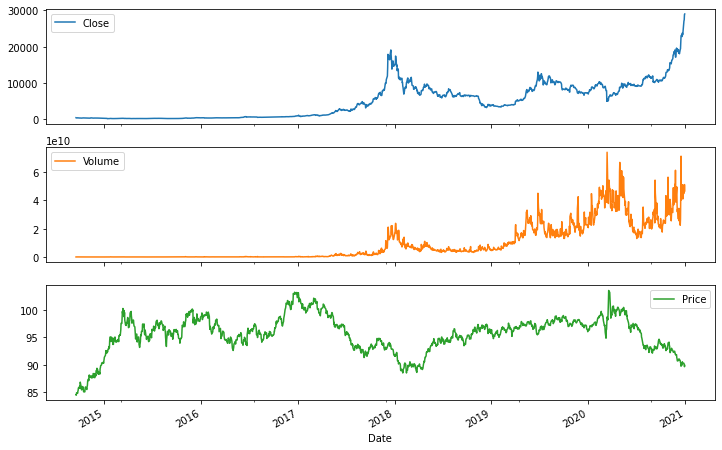

In [8]:
join = join.dropna()
join.plot(subplots=True, figsize=(12,8))

By comparing the prices of bitcoin and usd visually, we can see a peak in bitcoin around 2017-2018 and a decline in the usd around the same time. There is a similar pattern toward the end of 2020 going into 2021. We are going to investigate this further.

In [9]:
def plotcharts(y, title, lags=None, figsize=(12,8)):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=25)
    hist_ax.set_title("Histogram")
    smt.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

[Source](https://www.youtube.com/watch?v=_vQ0W_qXMxk&t=1157s)

In [10]:
series = join

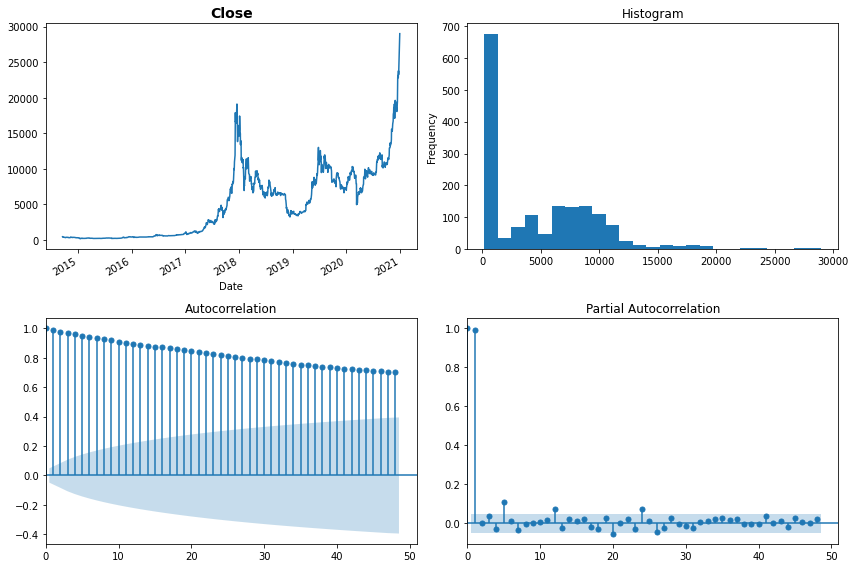

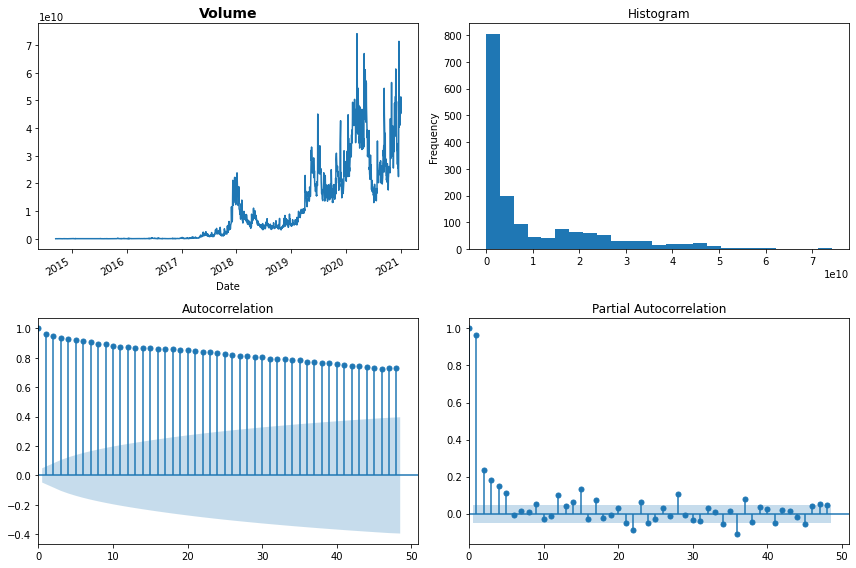

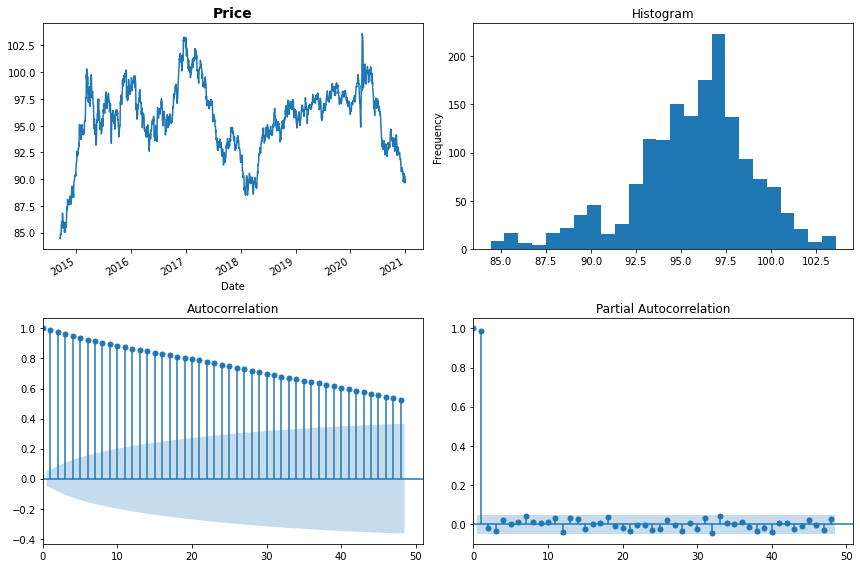

In [11]:
num_var = len(series.iloc[1,:])
for i in range(0, num_var):
    plotcharts(series.iloc[:,i].dropna(), title=series.columns[i], lags=48)

Here we plot four essential graphs that provide us insight into the closing price of bitcoin over this series of time. The bottom two graphs are the gprahs that allow you to look at the dependency structure. They're called the autocorrelation and partial autocorrection function graphs. Each bar on in the autocorrelation function graph captures the series itself and how it is correlated with it's own past. These sort of graphs are very useful for identifying the order of our model.

### Autocorrelation and Partial Autocorrelation

The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF) For example the ACF for a time series  is given by:

\begin{equation*} \mbox{Corr}(y_{t},y_{t-k}). \end{equation*}

This value of k is the time gap being considered and is called the lag. A lag 1 autocorrelation (i.e., k = 1 in the above) is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.

The ACF is a way to measure the linear relationship between an observation at time t and the observations at previous times. If we assume an AR(k) model, then we may wish to only measure the association between  and  and filter out the linear influence of the random variables that lie in between (i.e., ), which requires a transformation on the time series. Then by calculating the correlation of the transformed time series we obtain the partial autocorrelation function (PACF).

The PACF is most useful for identifying the order of an autoregressive model. Specifically, sample partial autocorrelations that are significantly different from 0 indicate lagged terms of  that are useful predictors of . To help differentiate between ACF and PACF, think of them as analogues to  and partial  values as discussed previously.

Graphical approaches to assessing the lag of an autoregressive model include looking at the ACF and PACF values versus the lag. In a plot of ACF versus the lag, if you see large ACF values and a non-random pattern, then likely the values are serially correlated. In a plot of PACF versus the lag, the pattern will usually appear random, but large PACF values at a given lag indicate this value as a possible choice for the order of an autoregressive model. It is important that the choice of the order makes sense. For example, suppose you have blood pressure readings for every day over the past two years. You may find that an AR(1) or AR(2) model is appropriate for modeling blood pressure. However, the PACF may indicate a large partial autocorrelation value at a lag of 17, but such a large order for an autoregressive model likely does not make much sense.

## Stationary Condition

Time series data consists of primary four components:

1. Trend 
2. Seasonality
3. Cyclically
4. Irregularity, sometimes referred to as the random component

#### Trend

- Trend is the increase or decrease in the series over a period of time, it persists over a long period of time.
- Example: Population growth over the years can be seen as an upward trend.

#### Seasonality

- Regular pattern of up and down fluctuations.
- It is a short-term variation occurring due to seasonal factors
- Example: Sales of ice-cream increases during the summer season

#### Cyclically

- It is a medium-term variation caused by circumstances, which repeat in irregular intervals.
- Example: 5 years of economic growth, followed by 2 years of economic recession, followed by 7 years of economic growth followed by 1 year of economic recession

#### Irregularity

- It refers to variations which occur due to unpredictable factors and also do not repeat in particular patterns.
- Example: Variations caused by incidents like earthquake, floods, war, etc.

If the dataset presents all four time series components then the data is non-stationary, which means that typically these components will be present. If the data is not stationary then the time series forecasting will effective. Applying it on a dataset with each component present will not really perform well.

So how do we differentiate between these time series. 

Stationary time series depends on:

1. Mean 
2. Variance
3. Co-variance

## Normalization

Normalized data within statistics, in often involves eliminating units of measurement from a dataset. As a result, this enables us to easily compare data with different scales and are measured from different sources.

Why is Normalized Data Important?
When training a machine learning model, we aim to bring the data to a common scale and so the various features are less sensitive to each other. In this case, we can utilize data normalization as a method of transforming our data, which may be of different units or scales (bitcoin and usd). This allows our model to train using features that could lead to more accurate predictions.

## Transformation

Applying differencing or seasonal differencing log of the series should make the series stationary.

Simply put, stationarity removes trends from the dataset which can be extremely intrusive to our models. Basically, stationarity makes our models perform and predict better.

Close    Volume     Price
0     0.448201  0.393353  0.553813
1     0.533220  0.363485  0.362545
2     0.505407  0.689480  0.435737
3     0.340867  0.270111  0.547072
4     0.447430  0.524224  0.405698
...        ...       ...       ...
1617  0.488355  0.399874  0.474946
1618  0.552466  0.552833  0.474820
1619  0.329215  0.421522  0.378648
1620  0.486753  0.514455  0.469458
1621  0.400896  0.429636  0.552474

[1622 rows x 3 columns]

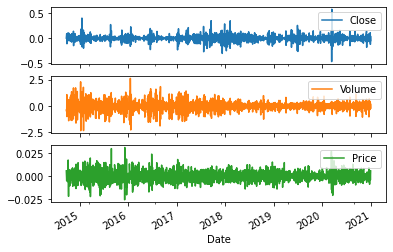

In [12]:
#log transformation
# Converting the data to a logarithmic scale
log = pd.DataFrame(np.log(series))

# Differencing the log values
#1
log_diff = log.diff().dropna()
#2
log_diff = log_diff.diff().dropna()
log_diff.plot(subplots=True)

#normalization
#importing minmaxscaler 
from sklearn.preprocessing import MinMaxScaler

#creating minmaxscaler object
norm = MinMaxScaler()

#applying norm to dataframe
join_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
join_norm

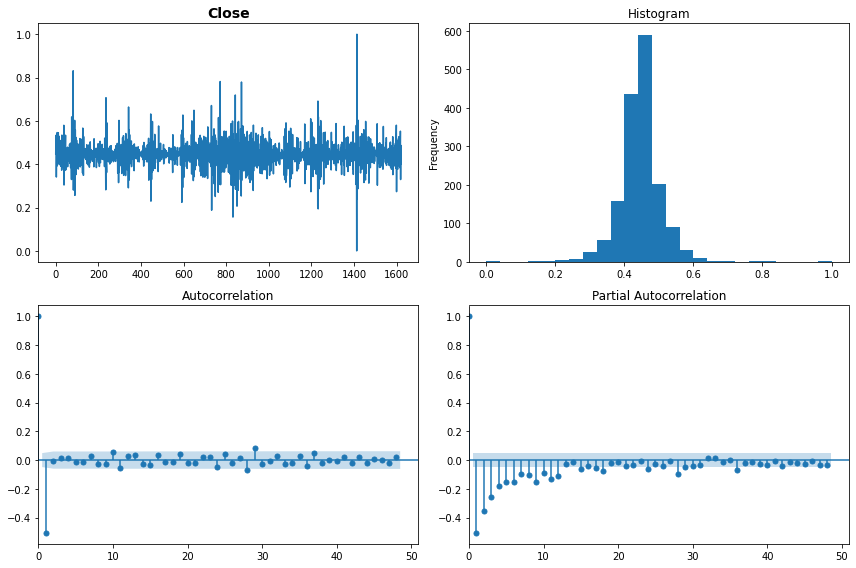

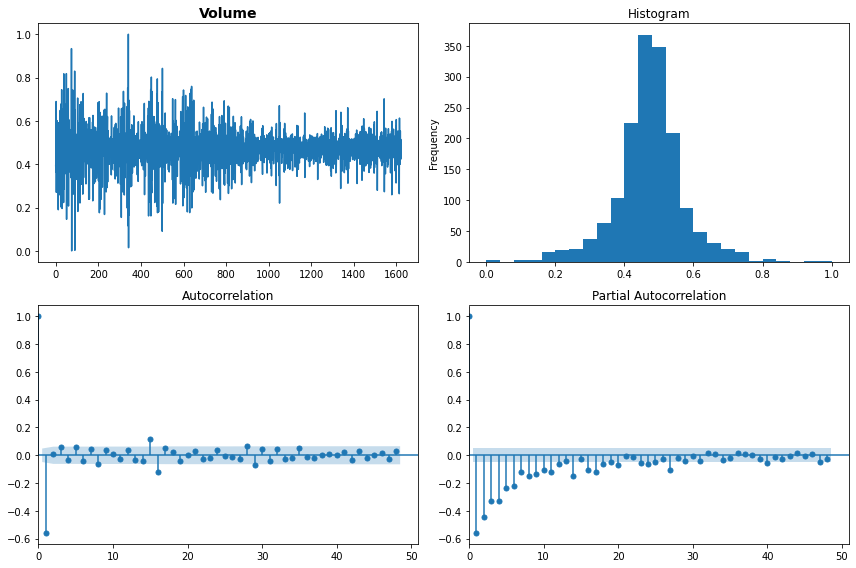

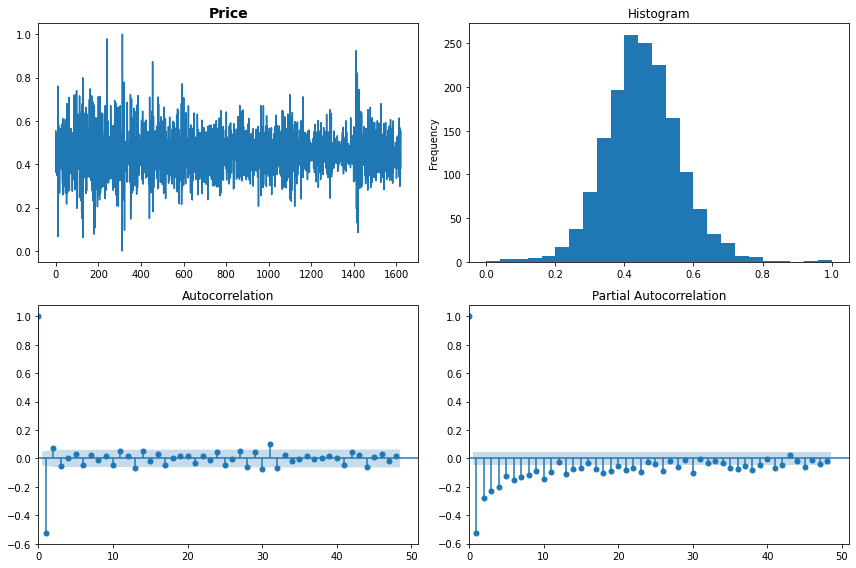

In [13]:
num_var = len(join_norm.iloc[1,:])
for i in range(0, num_var):
    plotcharts(join_norm.iloc[:,i].dropna(), title=join_norm.columns[i], lags=48)

Here we are running a statistical test to determine how well the times series was transformed to be stationary. This is a test that outputs certain statistical patterns that we can use to judge whether each parameter is stationary.

In [14]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag= "AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num of Observations Used For ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
        
ad_test(log_diff["Close"])
print("--------------------------------------------")
ad_test(log_diff["Volume"])
print("--------------------------------------------")
ad_test(log_diff["Price"])


1. ADF :  -12.80529574648931
2. P-Value :  6.620669599238984e-24
3. Num Of Lags :  25
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1596
5. Critical Values : 
	 1% :  -3.434453915243171
	 5% :  -2.863352636968251
	 10% :  -2.5677350125470317
--------------------------------------------
1. ADF :  -15.22708528508418
2. P-Value :  5.385112174930356e-28
3. Num Of Lags :  25
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1596
5. Critical Values : 
	 1% :  -3.434453915243171
	 5% :  -2.863352636968251
	 10% :  -2.5677350125470317
--------------------------------------------
1. ADF :  -15.091742535460574
2. P-Value :  8.174518354618346e-28
3. Num Of Lags :  25
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1596
5. Critical Values : 
	 1% :  -3.434453915243171
	 5% :  -2.863352636968251
	 10% :  -2.5677350125470317


Our data should be ready to be feed into our models.

# Models

We will be evaluating three methods for forecasting time series data.
1. Vector Autoregressive (VAR) Model
2. XGBoost Model
3. Facebook Prophet

#### Train-test Set Split

We now have to split the sample into training and validation sets. In time series we have to be careful with this because we cannot simply randomly select a training and testing set, because of the time dependence.

In practice you may need to estimate through a moving window or you train your model using some of the history and then you keep moving forward in order to test your model. 

Our dataset are given within daily intervals and so we can predict up to a particular number of days.

## Vector Autoregressive (AR) Model

VAR models (vector autoregressive models) are used for multivariate time series. The structure is that each variable is a linear function of past lags of itself and past lags of the other variables.

As an example suppose that we measure three different time series variables, denoted by x_{t,1} and x_{t,2}.

The vector autoregressive model of order 1, denoted as VAR(1), is as follows:

\begin{equation*}
x_{t,1} = \alpha_{1} + \phi_{11} x_{t−1,1} + \phi_{12}x_{t−1,2} + \phi_{13}x_{t−1,3} + w_{t,1}
\end{equation*}

\begin{equation*}
x_{t,2} = \alpha_{2} + \phi_{21} x_{t−1,1} + \phi_{22}x_{t−1,2} + \phi_{23}x_{t−1,3} + w_{t,2}
\end{equation*}

Each variable is a linear function of the lag 1 values for all variables in the set.

In a VAR(2) model, the lag 2 values for all variables are added to the right sides of the equations, In the case of three x-variables (or time series) there would be six predictors on the right side of each equation, three lag 1 terms and three lag 2 terms.

In general, for a VAR(p) model, the first p lags of each variable in the system would be used as regression predictors for each variable.

VAR models are a specific case of more general VARMA models. VARMA models for multivariate time series include the VAR structure above along with moving average terms for each variable. More generally yet, these are special cases of ARMAX models that allow for the addition of other predictors that are outside the multivariate set of principal interest.

[Source](https://online.stat.psu.edu/stat510/lesson/11/11.2)

In [15]:
# Splitting the dataset into train & test subsets
n_obs = 7
train, test = log_diff[:-n_obs], log_diff[-n_obs:]
log_diff.head()

Close    Volume     Price
Date                                    
2014-09-19  0.002242 -0.398250  0.005802
2014-09-22  0.090863 -0.547113 -0.005163
2014-09-23  0.061872  1.077629 -0.000967
2014-09-24 -0.109639 -1.012481  0.005416
2014-09-25  0.001438  0.254001 -0.002689

In [16]:
# Fitting the VAR model
from statsmodels.tsa.api import VAR

model = VAR(log_diff)
results = model.fit(maxlags = 22, ic = 'aic')
results.summary()

/Users/josedominguez/Desktop/crypto_forecast/env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Jan, 2021
Time:                     22:03:04
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.7848
Nobs:                     1602.00    HQIC:                  -19.1711
Log likelihood:           8902.36    FPE:                3.75899e-09
AIC:                     -19.3992    Det(Omega_mle):     3.36033e-09
--------------------------------------------------------------------
Results for equation Close
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000191         0.001149            0.166           0.868
L1.Close          -0.978262         0.025587          -38.233           0.000
L1.Volume          0.006704         0.004142            1.619           

After fitting the model, we see the results of the model. It provides the coefficient and other stats.

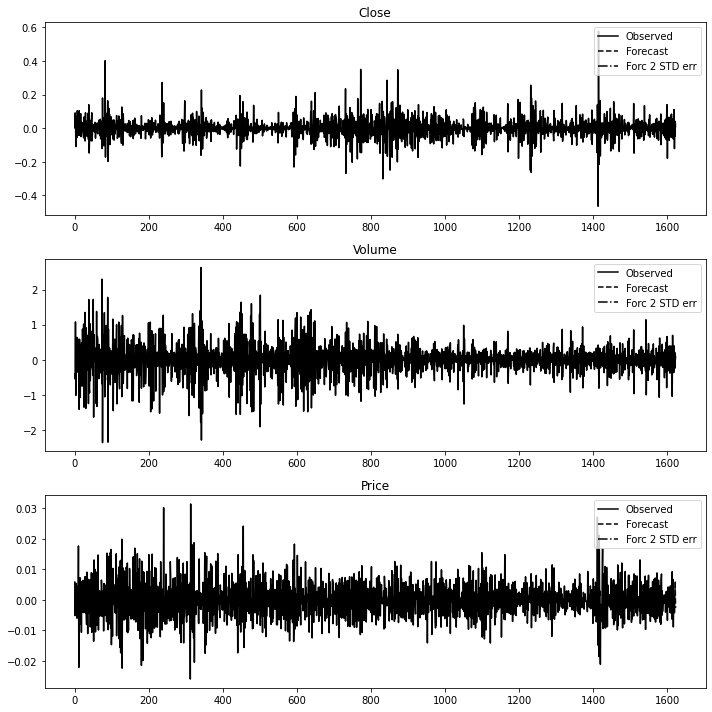

In [17]:
lag_order = results.k_ar
predicted = results.forecast(log_diff.values[-lag_order:],n_obs)
forecast = pd.DataFrame(predicted, index = log_diff.index[-n_obs:], columns = log_diff.columns)


# Plotting the Forecasted values
p1 = results.plot_forecast(1)
p1.tight_layout()


In [18]:
# Inverting the Differencing Transformation
def invert_transformation(df, df_forecast, second_diff):
    for col in df.columns:
        # Undo the 2nd Differencing
        if second_diff:
            df_forecast[str(col)] = (df[col].iloc[-1] - df[col].iloc[-2]) + df_forecast[str(col)].cumsum()
        # Undo the 1st Differencing
        df_forecast[str(col)] = df[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

forecast_values = invert_transformation(train, forecast, second_diff=True)
forecast_values

Close     Volume     Price
Date                                     
2020-12-22  0.023605   2.547356 -0.016685
2020-12-23  0.065058   4.430207 -0.032564
2020-12-24  0.107715   6.242649 -0.046541
2020-12-28  0.146517   8.133461 -0.061565
2020-12-29  0.174109   9.980145 -0.076811
2020-12-30  0.216510  11.892972 -0.092362
2020-12-31  0.268520  13.705780 -0.107648

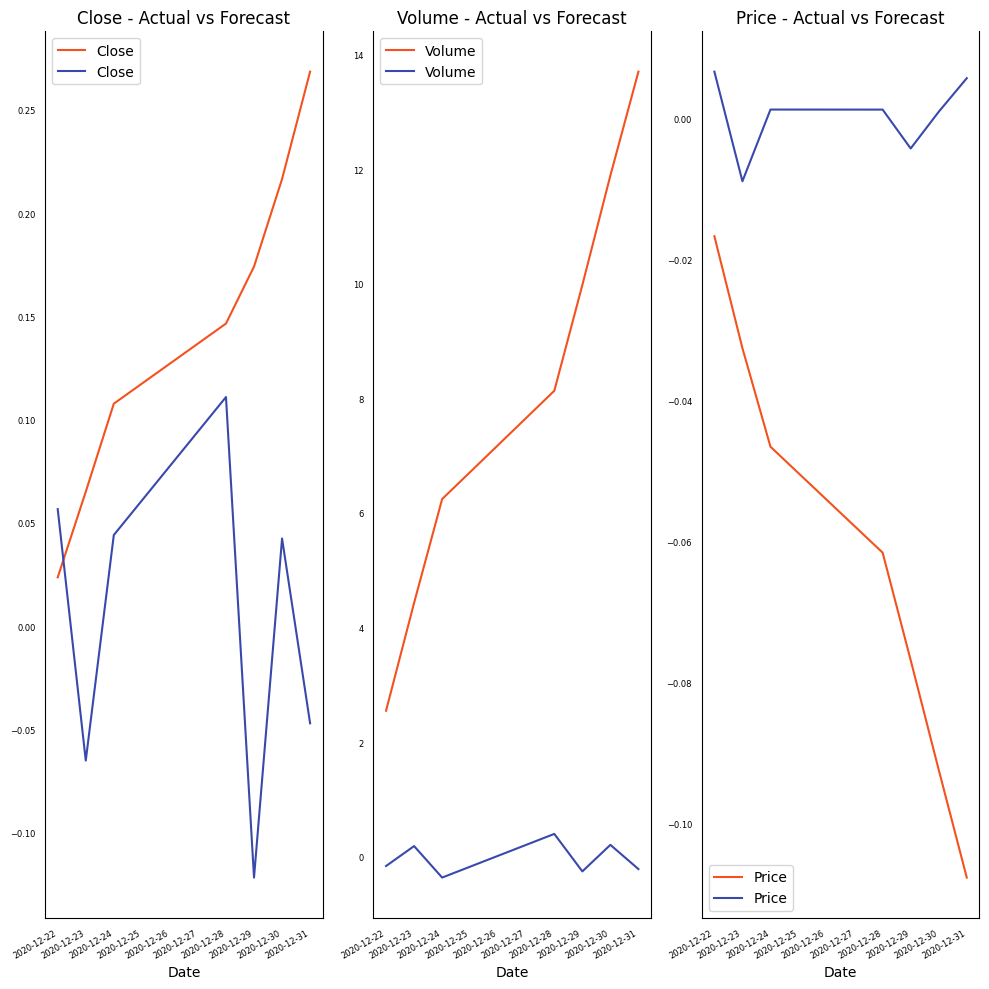

In [19]:
# Actual vs Forecasted Plots
fig, axes = plt.subplots(nrows = int(len(log_diff.columns)/2), ncols = 3, dpi = 100, figsize = (10,10))

for i, (col,ax) in enumerate(zip(log_diff.columns, axes.flatten())):
    forecast_values[col].plot(color = '#F4511E', legend = True, ax = ax).autoscale(axis =' x',tight = True)
    test[col].plot(color = '#3949AB', legend = True, ax = ax)

    ax.set_title(col + ' - Actual vs Forecast')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize = 6)

plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from numpy import asarray as arr
mse = mean_squared_error(test, forecast_values)
print("\nMean Squared Error: ", mse)


Mean Squared Error:  26.87915225460752


## XGBoost

Usually, ARIMA regressions are used in classical statistical approaches, when the goals not just prediction, but also understanding on how different explanatory variables relate with the dependent variable and with each other. ARIMA are thought specifically for time series data.

On the contrary, XGBoost models are used in pure Machine Learning approaches, where we exclusively care about quality of prediction. XGBoost regressors can be used for time series forecast, even though they are not specifically meant for long term forecasts. But they can work.

#### [What is Boosting and how XGBoost operates?](https://www.datacamp.com/community/tutorials/xgboost-in-python#what)

In [21]:
#importing xgboost and train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split

#displaying dataset
log_diff.head()

Close    Volume     Price
Date                                    
2014-09-19  0.002242 -0.398250  0.005802
2014-09-22  0.090863 -0.547113 -0.005163
2014-09-23  0.061872  1.077629 -0.000967
2014-09-24 -0.109639 -1.012481  0.005416
2014-09-25  0.001438  0.254001 -0.002689

In [22]:
# Splitting the dataset into train & test subsets
X, y = log_diff.iloc[:,:], log_diff.iloc[:,:-2]

data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [23]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 1, alpha = 10, n_estimators = 200)

In [24]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[22:03:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.036478


In [26]:
data_dmatrix

### Cross Validation (k-fold)

Since XGBoost is not specific for time series data in order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the cv() method. All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build.

<small>[Source](https://www.datacamp.com/community/tutorials/xgboost-in-python/)</small>

In [27]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 2, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[22:03:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.455483        0.000682        0.455482       0.001632
1         0.411845        0.000595        0.411844       0.001681
2         0.372614        0.000576        0.372689       0.001749
3         0.337340        0.000494        0.337381       0.001825
4         0.305691        0.000490        0.305742       0.001943

In [29]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.043692
Name: test-rmse-mean, dtype: float64


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

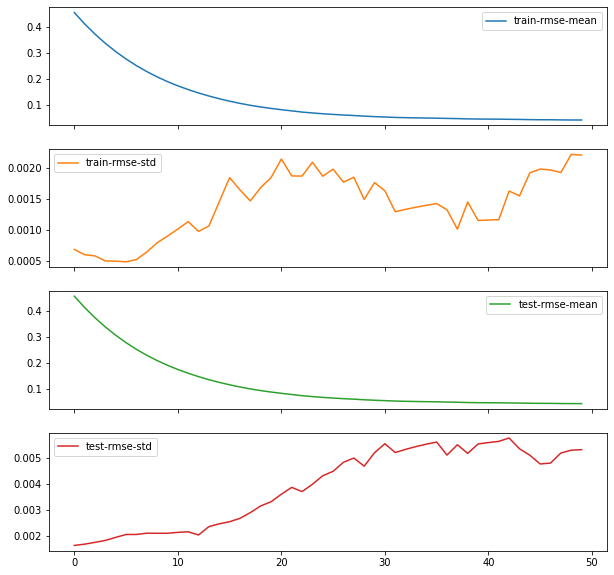

In [30]:
cv_results.plot(subplots=True, figsize=(10,10))

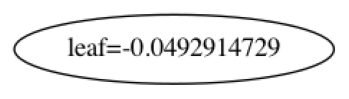

In [33]:
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(xg_reg, {'max_depth': [2,4,6],'n_estimators': [50, 100, 200]}, verbose=1,n_jobs=2)
clf.fit(X, y)

print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[22:03:55] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.7435389383437943
{'max_depth': 2, 'n_estimators': 200}


## Facebook Prophet

Open-source library available [here](https://facebook.github.io/prophet/)

Facebook prophet was created to work as a tool for most general time series predictions. It is easy to use and it teaches beginners machine learning in an intuitive way.

Facebook also allows for those with domain knowledge to not be blocked when they get an answer and get some additional insight that may yield some value.

If you use other forecasting libraries. Those other libraries have done a lot of the foundational work and forecasting that they have two automated methods in the library one is auto.arima and the other is exponential smoothing. They both perform a model selection process so they're really trying to do a lot of work for you and take a lot of difficulty out of building the model, but sometimes you would get bad performing models, if you were to simply apply it to a dataset. As the results aren't always intuitive enough to make the forecast better.

Facebook prophet is able to visualize significant features in the time series such as trends, outliers, seasonality, etc. Also, the forecasting method is robust enough to handle any missing values.

So typically with times series problems you would want to model the generative process of how this times series would be created. That becomes difficult to write, a generative model for a time series process is like at each state a new issue is going to happen and it is going to depend on the past in some way. Instead, facebook built a discriminative model, which is a simple decomposable time series model. It's a generalized additive model so each component is additive but the individual components may not be linear.

\begin{equation*}
y(t) = \text{piecewise_trend}(t) + \text{seasonality}(t) + \text{holiday_effects}(t) + \text{noise}
\end{equation*}

The first component is a piecewise trend, that could either be a logistic trend or a linear trend, and that's going to account for basically how fast the time series is growing or declining.

The second component is seasonality, that is something that happens regularly in cycles. There is some holiday effects and noise reduction included.

The piecewise trend is developed using L1-regularized trend shifts. The seasonality is developed using Fourier series. And the holiday effects are developed using dummy variables. They aren't too complex.

The piecewise linear trend or the logistic trend  is developed by generating a bunch a candidate change points. These are point where the model is it thinking could potentially change its trajectory, then they place a Laplace prior, which is like a sparse prior, on it's going to assume that most of time those changes are zero, but some of the time it's going to allow it to change. So the data is basically going to tell us when the time series has shifted its trajectory, which is a really nice feature. So prophet is learning from the data how to extrapolate locally from modeling from the past data.

[Source](https://www.youtube.com/watch?v=pOYAXv15r3A&feature=youtu.be)

In [35]:
#importing prophet and fitting model
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [36]:
#functions to automate prophet charts for each series
def fit_model(df):
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    return m, forecast, future

def fb_plots(m, fore):
    return plot_plotly(m, forecast)

def fb_subplots(m, fore):
    return m.plot(forecast), m.plot_components(forecast)

### Bitcoin Closing Price Forecast

In [37]:
bc = pd.read_csv("data/BTC-USD.csv")
bc_price = bc.drop(bc.columns[[1,2,3,5,6]], axis=1)
bc_vol = bc.drop(bc.columns[[1,2,3,4,5]], axis=1)
bc_price.columns = ["ds","y"]
bc_vol.columns = ["ds","y"]
bc_price.head()

ds           y
0  2014-09-17  457.334015
1  2014-09-18  424.440002
2  2014-09-19  394.795990
3  2014-09-20  408.903992
4  2014-09-21  398.821014

In [38]:
model, forecast, future = fit_model(bc_price)

In [39]:
future.tail()

ds
2661 2021-12-30
2662 2021-12-31
2663 2022-01-01
2664 2022-01-02
2665 2022-01-03

In [40]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
2661 2021-12-30  22790.991840  16811.103153  29307.560030
2662 2021-12-31  22748.959396  16192.229824  29294.608620
2663 2022-01-01  22713.652569  15941.428003  29173.054334
2664 2022-01-02  22626.848463  15999.729387  29287.119767
2665 2022-01-03  22522.965902  16082.164574  29068.394098

In [41]:
fb_plots(model, forecast)

The forecast is expecting bitcoin to continue rising in value. There has a been a new spike at the end of 2020 that added to this prediction. 

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

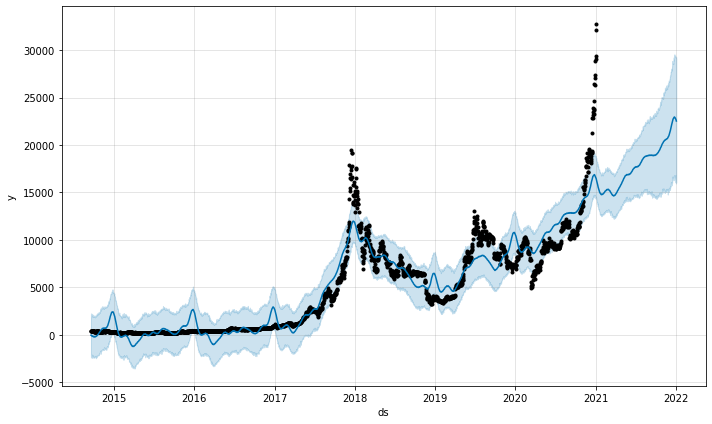

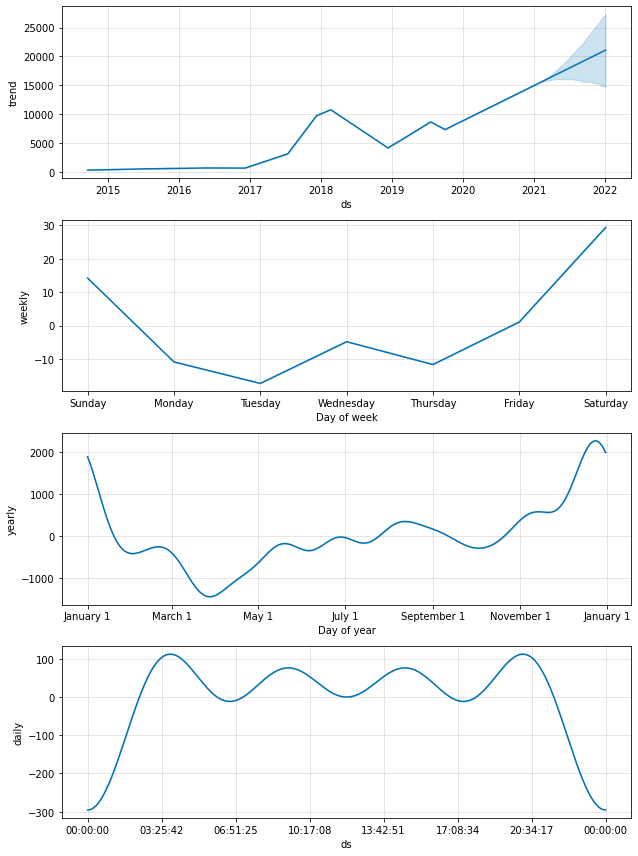

In [42]:
fb_subplots(model, forecast)

### US Price Forecast

In [43]:
usd = pd.read_csv("data/USD.csv")
usd = usd.drop(usd.columns[[2,3,4,5,6]], axis=1)
usd.columns = ["ds","y"]
usd.head()

ds       y
0  Dec 31, 2020  89.894
1  Dec 30, 2020  89.649
2  Dec 29, 2020  89.918
3  Dec 28, 2020  90.275
4  Dec 24, 2020  90.250

In [44]:
model, forecast, future = fit_model(usd)

In [45]:
future.tail()

ds
2018 2021-12-27
2019 2021-12-28
2020 2021-12-29
2021 2021-12-30
2022 2021-12-31

In [46]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
2018 2021-12-27  86.126509   59.909727  111.514438
2019 2021-12-28  86.140068   59.741899  111.844021
2020 2021-12-29  86.128816   60.100295  111.435912
2021 2021-12-30  86.117074   59.618719  111.647740
2022 2021-12-31  86.142559   59.789820  111.551689

In [47]:
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

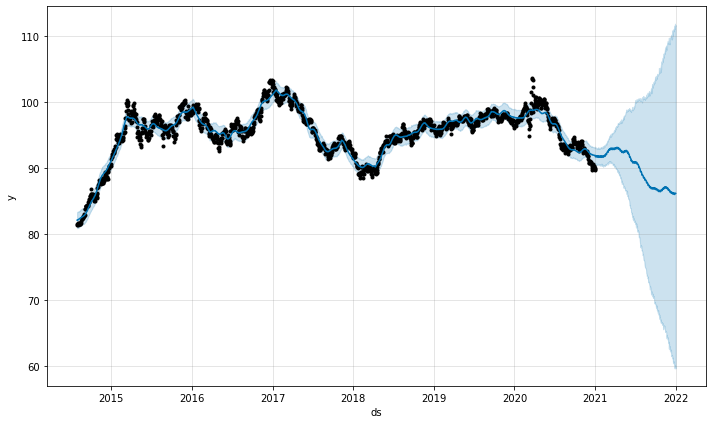

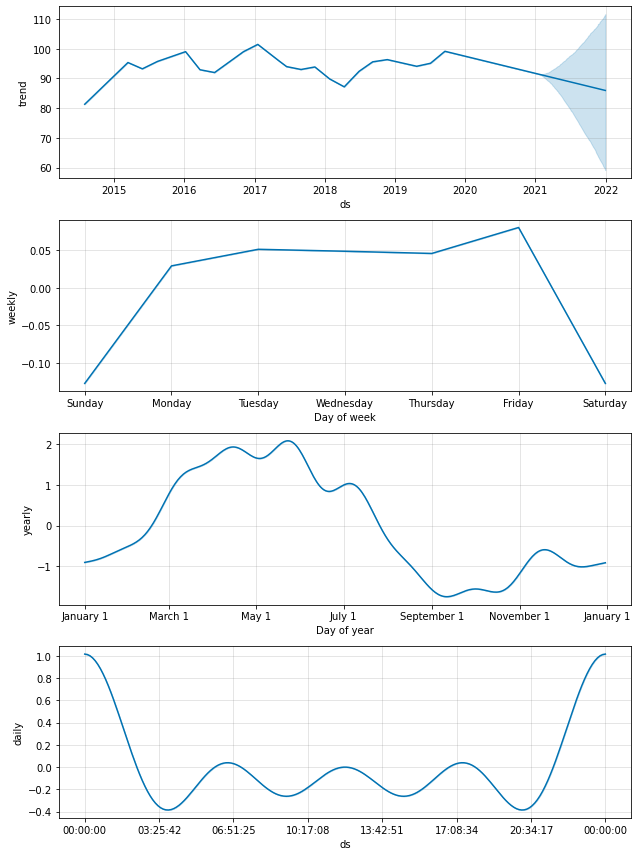

In [48]:
fb_subplots(model, forecast)

### Bitcoin Volume Forecast

In [49]:
bc_vol.head()

ds         y
0  2014-09-17  21056800
1  2014-09-18  34483200
2  2014-09-19  37919700
3  2014-09-20  36863600
4  2014-09-21  26580100

In [50]:
model, forecast, future = fit_model(bc_vol)

In [51]:
future.tail()

ds
2661 2021-12-30
2662 2021-12-31
2663 2022-01-01
2664 2022-01-02
2665 2022-01-03

In [52]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
2661 2021-12-30  4.949966e+10  4.108817e+10  5.730941e+10
2662 2021-12-31  4.902097e+10  4.048260e+10  5.724831e+10
2663 2022-01-01  4.813216e+10  3.986432e+10  5.606174e+10
2664 2022-01-02  4.829122e+10  3.941029e+10  5.609157e+10
2665 2022-01-03  4.908803e+10  4.015684e+10  5.711408e+10

In [53]:
fb_plots(model, forecast)

We are easily able o view a forecast for the volume of bitcoin. The forecast is predicting the trend to countine to rise. We can most likely attribute this to the levels of users trading on robinhood or other platforms. There is growing demand and as more individuals buy in the more bitcoin is in cirruculation throughout the economy.

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

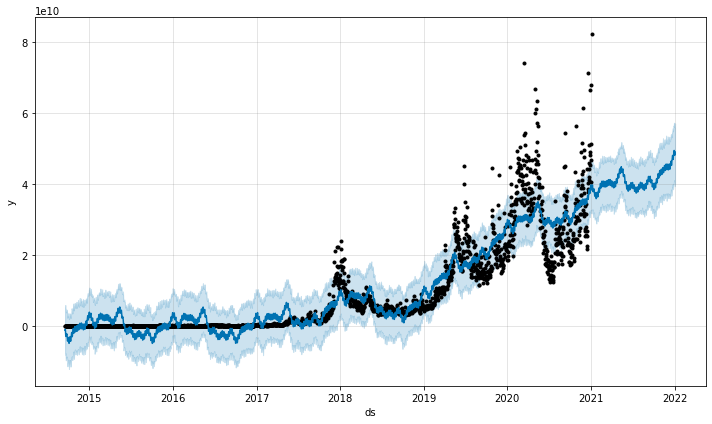

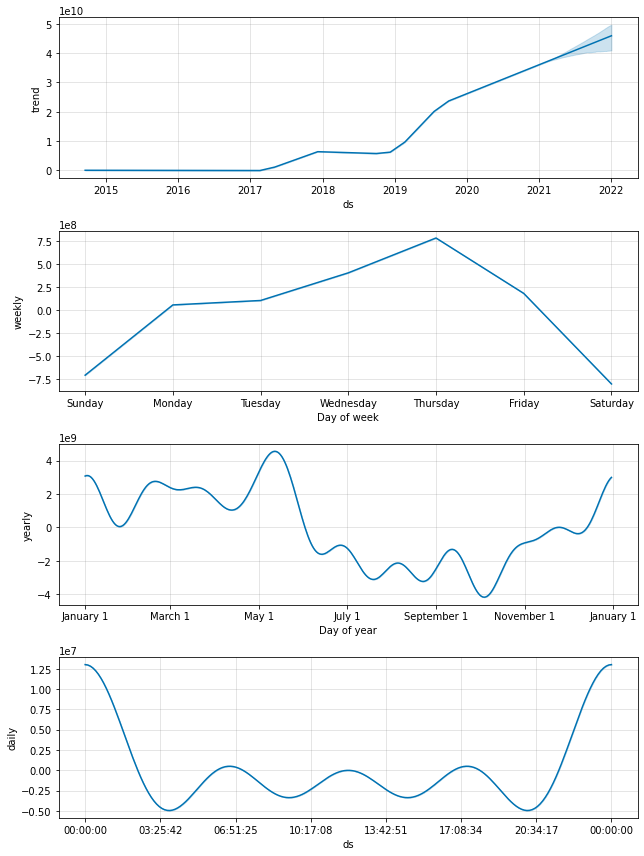

In [54]:
fb_subplots(model, forecast)

Prophet easily allows us to quick view forecasts for an individual series. Here we were able to do so for the Bitcoin closing price, the USD price, and the colume of Bitcoin. These variables are important because, as mentioned in the being analysts are considering the surge in bitcoin due to the ease of individuals being able to trade via robinhood and other apps, as well as a hedge against the US Dollar because of the current state of global affairs.

According to the forecasts for each series, at least for the near future we are going to continue to see bitcoin to rise in value. This could be attributed to the forecast that the US Dollar to decrease and the forecast that the amount of bitcoin is curriculation is also going to increase.

The initial two models (VAR & XGBoost) were able to determine at least one of these insights, but not as easily or quickly as prophet.